# Segundo metodo
$$
Y_{n+1} = y_n + hf(x_n,y_n) + \frac{h^2}{2} \left(
\frac{\partial f }{\partial x} + \frac{\partial 
f}{\partial y} f \right)
$$

In [37]:
def segundo_orden1(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo=arange(0,t_final+h,h) #
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0] 
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [38]:
from pylab import *
%matplotlib inline

In [39]:
def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo=arange(0,t_final+h,h) #
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [40]:
def ec_dif(y,x):
    return x*sin(y)

def d_ec_dif(y,x):
    return sin(y),x*cos(y)

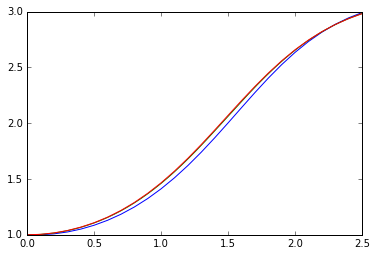

In [46]:
y_euler = euler1(ec_dif,1,2.5)
y_euler_01 = euler1(ec_dif,1,2.5,0.01)
y_seg = segundo_orden1(ec_dif,1,2.5,d_ec_dif)
plot(y_euler[0],y_euler[1])
plot(y_euler_01[0],y_euler_01[1])
plot(y_seg[0],y_seg[1])
legend()
show()